# Exercise 5: Voter model



### Learning objectives
1. Internalise the understanding of Voter model with hand-on experience
2. Observe the difference between deterministic and stochastic dynamics 
3. Analyse the ABM by means of individual and collective statistics
4. Mesa: `DataCollector` class that helps to collect the dinamics data from the model (difference with `BatchRunner`?)
5. Data manipulation and plotting in `pandas`

### Tasks
1. **Complete the code for agent opinion for `deterministic` and `linear` dynamics**  
    Inspect the code provided to you.
    You find incomplete code stubs starting on the line 46 in `agent-skeleton.py`, which you should complete.
    Once ready, save the file as `agent.py`

1. **Learn how to use `DataCollector` in Mesa**  
    Read the corresponding section in the Mesa Intro tutorial: https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html#collecting-data  

1. **Complete `mean_opinion` function in `model-skeleton.py`**  
    This function (to be defined starging on line 10) is used by the `DataCollector`, as you can see in the `VoterModel` class definition.
    It is supposed to compute and return the average opinion (basically, the share between opinions 1 and 0) in the model.
    Once done, save the file as `model.py`  
    
1. **Test your implementation**  
    With the above completed, you can run the model and view its dynamics.  
    You can do so by running the `run.py` file by, e.g., calling `python3 run.py` in the terminal (system dependent).  
    Play with the model parameters defined in `server.py`, in the `params` dictionary.
    1. What happens if you increase the initial  fraction of the opinion 1 (parameter `prob_one`) for deterministic and linear cases?
    1. What happens in the case of *deterministic minority rule*?  

1. **Plot the time series of the model and agent dynamics**  
    It is time to use the DataCollector funcionality.  
    Here, in this notebook:
    1. Plot the evolution of the mean opinion over the runtime of the model (see the into tutorial linked above).  
        How can you interpret the result?  
        How does the outcome change if you change the model parameters?  
        
    1. Plot the dynamics of the individual agents of the runtime of the model.  
        For this task, refer to the documentation of `pandas` package because `DataCollector` provides you with a so called `DataFrame`, which is the core of `pandas`.  
        The corresponding data frame is called `agent_opinions` in the code skeleton below.  
        If you print it, you will see that it has two nested index columns, one for the time step, the other for the agent.
        What you want is to have one plot, where on x axis we have the model time, and on the y axis we have agent opinion, for multiple agenst.
        Hint: plot the opinions of only a small number of agents, to avoid a very messy outcome.  
    
1. **Reproduce the phase diagram shown in slide 05 of lecture 05**      

In [1]:
# YOUR IMPORTS HERE ....
%matplotlib inline
import matplotlib.pyplot as plt

## Without autoreload, you necessarily have to restart the notebook kernel
## when you make changes in the imported .py modules of the model.
## See the docs:
##    https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

import numpy as np
from random import sample

from model import VoterModel

## Task 5.A

In [7]:
## SET THE PARAMETERS
params = {"width": 50, 
          "height": 50,
          "percentage_of_cops":0.3,
          "percent_of_citizens":0.6
         }

## DEFINE THE MODEL 
votermodel = VoterModel(**params)

In [8]:
## RUN THE MODEL
votermodel.run_model()

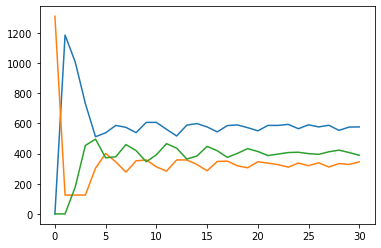

In [9]:
mean_opinion = votermodel.datacollector.get_model_vars_dataframe() ## GET THE FINAL OPINION
a=mean_opinion.values
len(a)
active=list()
passive=list()
cops=list()
for i in range(len(a)):
    active.append(a[i][0][0])
    passive.append(a[i][0][1])
    cops.append(a[i][0][2])
#print(active)
#mean_opinion.plot()
plt.plot(range(len(active)),active)
plt.plot(range(len(passive)),passive)
plt.plot(range(len(cops)),cops)
plt.show()

## Task 5.B

In [10]:
agent_opinions = votermodel.datacollector.get_agent_vars_dataframe()

In [11]:
agent_opinions

Opinion
Step AgentID          
0    (0, 0)          3
     (0, 1)          3
     (0, 2)          3
     (0, 3)          3
     (0, 4)          3
...                ...
30   (49, 45)        2
     (49, 46)        2
     (49, 47)        2
     (49, 48)        2
     (49, 49)        2

[69905 rows x 1 columns]

## Task 5.C

In [ ]:
initial_f = np.linspace(0,1,20)
no_sim = 10 # number of simulations

In [ ]:
# run no_sim simulations for each initial value in initial_f
# suggestion: use a smaller grid to be faster

In [ ]:
# from https://matplotlib.org/2.0.2/examples/mplot3d/hist3d_demo.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = # order_parameter_M
y = # initial fraction of agent with opinion 1
hist, xedges, yedges = np.histogram2d(x, y, bins=10, range=[[-1, 1], [0, 1]], density=True)

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1])
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.2 * np.ones_like(zpos)
dy = dx.copy() 
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha =0.8)
ax.set_ylabel(r"$f\,(0)$", fontsize =14)
ax.set_xlabel(r"$M$", fontsize =14)
ax.set_xticks([-1,-0.5, 0, 0.5, 1])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])